#                                AI IMAGE CLASSIFIER

In [5]:
import os
import cv2 as cv
import numpy as np
import random
import matplotlib.pyplot as plt


CIFAKE: Real and AI-Generated Images

In [6]:
TRAIN_DIR = "./train"
TEST_DIR  = "./test"

CATEGORIES = ["REAL", "FAKE"]


In [7]:
img_size = 48

In [8]:
def load_data(base_dir):
    data = []
    for label, category in enumerate(CATEGORIES):
        path = os.path.join(base_dir, category)
        for img in os.listdir(path):
            try:
                img_path = os.path.join(path, img)
                img_array = cv.imread(img_path)
                img_array = cv.resize(img_array, (img_size, img_size))
                data.append([img_array, label])
            except:
                pass
    return data


In [10]:
training_data = load_data(TRAIN_DIR)
testing_data  = load_data(TEST_DIR)

random.shuffle(training_data)
random.shuffle(testing_data)

In [11]:
X_train = []
y_train = []

for features, label in training_data:
    X_train.append(features)
    y_train.append(label)

X_test = []
y_test = []

for features, label in testing_data:
    X_test.append(features)
    y_test.append(label)

In [12]:
X_train = np.array(X_train).reshape(-1, 48, 48, 3) / 255.0
X_test  = np.array(X_test).reshape(-1, 48, 48, 3) / 255.0

y_train = np.array(y_train)
y_test  = np.array(y_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(100000, 48, 48, 3) (100000,)
(20000, 48, 48, 3) (20000,)


(-0.5, 47.5, 47.5, -0.5)

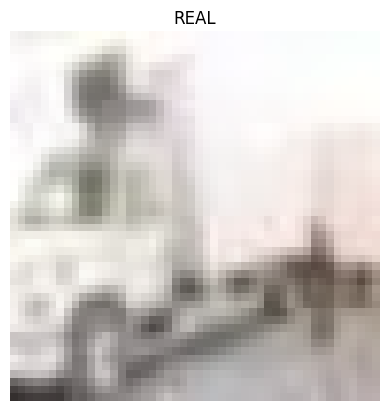

In [13]:
plt.imshow(X_train[0])
plt.title("REAL" if y_train[0] == 0 else "FAKE")
plt.axis("off")

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [15]:
print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.17.0
GPU available: []


In [16]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,649 (1.36 MB)

 Trainable params: 355,649 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [19]:
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 238s 74ms/step - accuracy: 0.7355 - loss: 0.5135 - val_accuracy: 0.8533 - val_loss: 0.3462
Epoch 2/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 226s 72ms/step - accuracy: 0.8609 - loss: 0.3268 - val_accuracy: 0.8791 - val_loss: 0.2862
Epoch 3/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 294s 94ms/step - accuracy: 0.8876 - loss: 0.2746 - val_accuracy: 0.9016 - val_loss: 0.2435
Epoch 4/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 244s 78ms/step - accuracy: 0.9023 - loss: 0.2434 - val_accuracy: 0.9094 - val_loss: 0.2238
Epoch 5/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 257s 82ms/step - accuracy: 0.9143 - loss: 0.2155 - val_accuracy: 0.9211 - val_loss: 0.1960
Epoch 6/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 284s 91ms/step - accuracy: 0.9227 - loss: 0.1979 - val_accuracy: 0.9275 - val_loss: 0.1850
Epoch 7/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 248s 79ms/step - accuracy: 0.9260 - loss: 0.1888 - val_accuracy: 0.9275 - val_loss: 0.1821
Epoch 8/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 298s 95ms/step - accuracy: 

In [20]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9360 - loss: 0.1662
Test Accuracy: 0.9369000196456909


In [21]:
model.save("ai_image_classifier.h5")

In [22]:
y_pred_prob = model.predict(X_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step


In [23]:
y_pred = (y_pred_prob > 0.5).astype("int32").reshape(-1)

In [24]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test,
    y_pred,
    target_names=["REAL", "FAKE"]
))

              precision    recall  f1-score   support

        REAL       0.96      0.91      0.94     10000
        FAKE       0.91      0.97      0.94     10000

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000



In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[9084  916]
 [ 346 9654]]


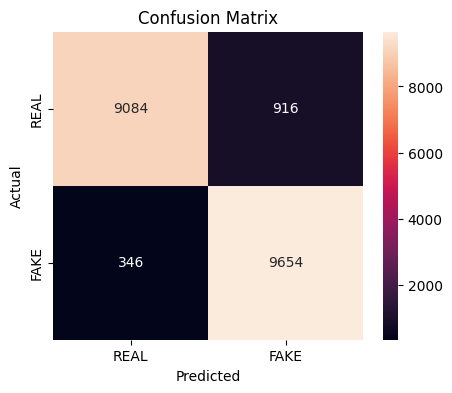

In [28]:
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=["REAL", "FAKE"],
            yticklabels=["REAL", "FAKE"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [35]:
def predict_image(img_path):
    img = cv.imread(img_path)
    img = cv.resize(img, (48, 48))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    prob = model.predict(img)[0][0]
    label = "FAKE" if prob > 0.5 else "REAL"

    return label, prob

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


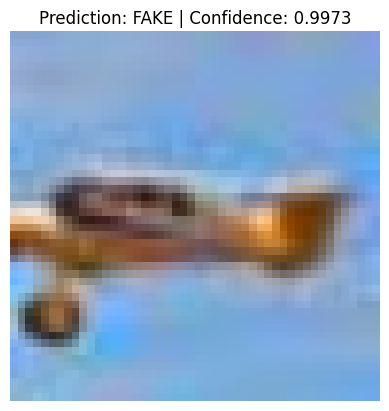

Prediction: FAKE
Confidence: 0.9972983


In [41]:
img_path = "./test/FAKE/0.jpg"

img = cv.imread(img_path)
img_resized = cv.resize(img, (48, 48))
img_norm = img_resized / 255.0
img_input = np.expand_dims(img_norm, axis=0)

prob = model.predict(img_input)[0][0]
label = "FAKE" if prob > 0.5 else "REAL"

plt.imshow(cv.cvtColor(img_resized, cv.COLOR_BGR2RGB))
plt.title(f"Prediction: {label} | Confidence: {prob:.4f}")
plt.axis("off")
plt.show()

print("Prediction:", label)
print("Confidence:", prob)
